<a href="https://www.kaggle.com/code/subhajeetdas/amazon-stock-price-prediction?scriptVersionId=125697696" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Amazon Stock Price Detection</h1>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/amazon-stock-price-all-time/Amazon.csv


# Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")

In [3]:
viz = df.copy()

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(6155, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6155.0,5.205563e+02,8.571617e+02,1.406250,3.875000e+01,9.267000e+01,5.289500e+02,3.744000e+03
High,6155.0,5.262161e+02,8.658210e+02,1.447917,3.951500e+01,9.419000e+01,5.353050e+02,3.773080e+03
Low,6155.0,5.142773e+02,8.472709e+02,1.312500,3.810500e+01,9.075000e+01,5.219500e+02,3.696790e+03
Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Adj Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Volume,6155.0,7.329010e+06,7.149521e+06,487200.000000,3.579350e+06,5.470000e+06,8.294950e+06,1.043292e+08


# Train & Test Splitting the Data

In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1008,2001-05-15,13.350000,14.300000,13.140000,13.540000,13.540000,6131200
4730,2016-03-03,577.960022,579.869995,573.109985,577.489990,577.489990,2741300
5922,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
5924,2020-11-27,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900
2320,2006-08-04,26.940001,27.590000,26.799999,27.290001,27.290001,10252400
4676,2015-12-14,641.750000,658.590027,635.270020,657.909973,657.909973,4329700
4306,2014-06-26,328.489990,328.649994,322.130005,325.690002,325.690002,2699500
3158,2009-12-02,139.149994,142.669998,138.960007,142.250000,142.250000,11798000
2310,2006-07-21,33.849998,33.970001,32.919998,33.189999,33.189999,7136600
2823,2008-08-05,76.919998,79.519997,76.519997,79.110001,79.110001,7794600


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2282,2006-06-12,34.000000,34.450001,33.490002,33.599998,33.599998,4195800
908,2000-12-19,20.312500,20.875000,17.375000,18.250000,18.250000,13218500
1293,2002-07-09,15.050000,16.030001,14.980000,15.600000,15.600000,7528600
646,1999-12-07,88.000000,88.000000,84.375000,86.062500,86.062500,6727100
4812,2016-06-29,715.750000,719.500000,713.539978,715.599976,715.599976,3070100
2234,2006-04-03,36.669998,37.330002,36.099998,36.139999,36.139999,5054000
5048,2017-06-07,1005.950012,1010.250000,1002.000000,1010.070007,1010.070007,2823000
4259,2014-04-21,323.970001,331.149994,322.309998,330.869995,330.869995,2999400
6139,2021-10-06,3213.530029,3264.340088,3198.620117,3262.010010,3262.010010,2533000
5285,2018-05-16,1577.500000,1594.430054,1576.670044,1587.280029,1587.280029,2570600


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Logistic Regression

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

# Visualizing the Data

In [16]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [17]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-17,NaN
1997-05-18,NaN
1997-05-19,1.708333
...,...
2021-10-23,NaN
2021-10-24,NaN
2021-10-25,3320.370117


In [18]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

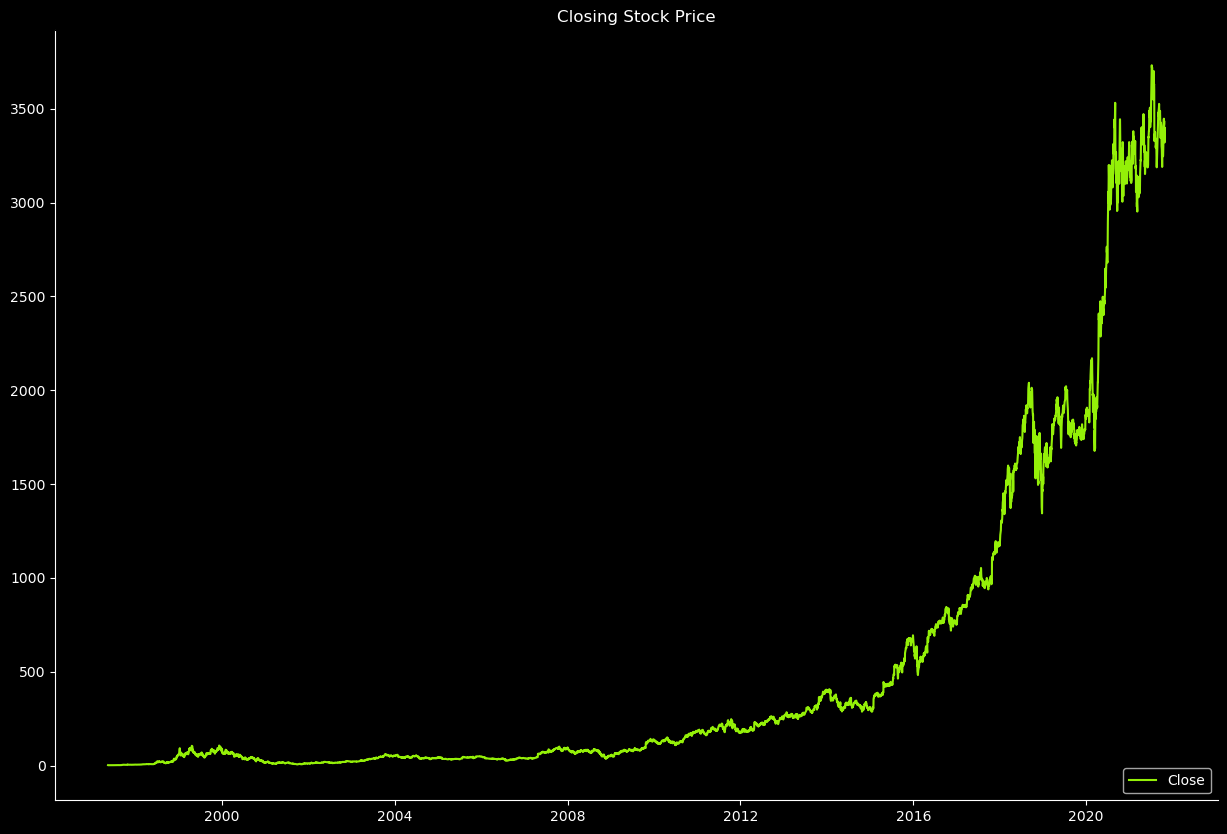

In [19]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

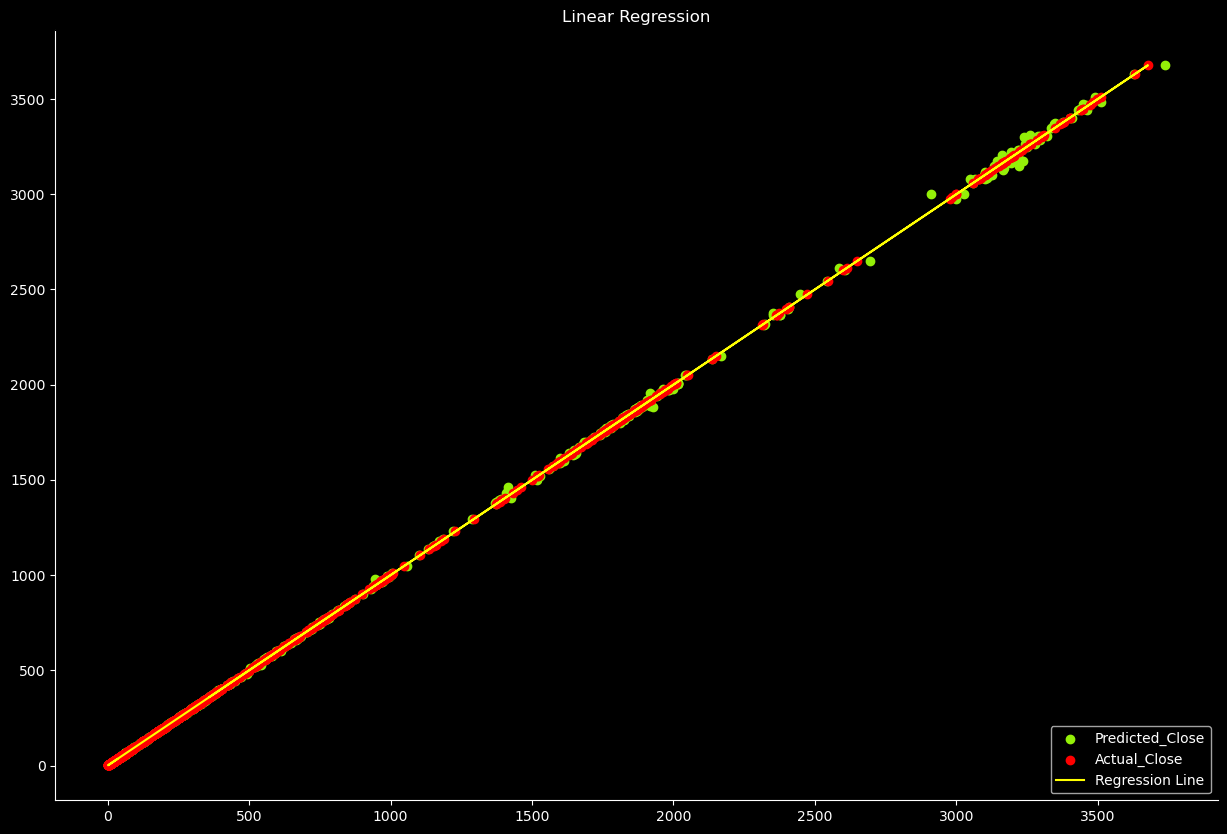

In [20]:
style()

plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')

# Model Evaluation

In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 58.814
RMSE 7.669
MAE 2.921
MAPE 0.01
R2 Score :  1.0


In [22]:
pred_df = test.copy()
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume
2282,2006-06-12,34.000000,34.450001,33.490002,33.599998,33.599998,4195800
908,2000-12-19,20.312500,20.875000,17.375000,18.250000,18.250000,13218500
1293,2002-07-09,15.050000,16.030001,14.980000,15.600000,15.600000,7528600
646,1999-12-07,88.000000,88.000000,84.375000,86.062500,86.062500,6727100
4812,2016-06-29,715.750000,719.500000,713.539978,715.599976,715.599976,3070100
...,...,...,...,...,...,...,...
3354,2010-09-14,144.500000,146.699997,143.830002,145.750000,145.750000,4319400
5305,2018-06-14,1713.479980,1724.800049,1708.869995,1723.859985,1723.859985,3174400
1376,2002-11-04,19.389999,19.809999,18.590000,18.780001,18.780001,12963500
5869,2020-09-10,3307.219971,3349.889893,3170.550049,3175.110107,3175.110107,5330700


In [23]:
result = model.predict([[2.437500, 2.500000, 1.927083, 72156000]])
print(result)

[1.30373186]


In [24]:
pred_df['Close_Prediction'] = y_pred
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
2282,2006-06-12,34.000000,34.450001,33.490002,33.599998,33.599998,4195800,34.099818
908,2000-12-19,20.312500,20.875000,17.375000,18.250000,18.250000,13218500,18.502892
1293,2002-07-09,15.050000,16.030001,14.980000,15.600000,15.600000,7528600,15.901939
646,1999-12-07,88.000000,88.000000,84.375000,86.062500,86.062500,6727100,85.246728
4812,2016-06-29,715.750000,719.500000,713.539978,715.599976,715.599976,3070100,717.145035
...,...,...,...,...,...,...,...,...
3354,2010-09-14,144.500000,146.699997,143.830002,145.750000,145.750000,4319400,145.925748
5305,2018-06-14,1713.479980,1724.800049,1708.869995,1723.859985,1723.859985,3174400,1719.139079
1376,2002-11-04,19.389999,19.809999,18.590000,18.780001,18.780001,12963500,19.125211
5869,2020-09-10,3307.219971,3349.889893,3170.550049,3175.110107,3175.110107,5330700,3236.293260


In [25]:
pred_df[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1231.0,532.986544,863.140041,1.395833,39.945000,118.489998,566.204987,3677.360107
Close_Prediction,1231.0,532.866369,862.871895,1.368803,40.045101,117.857064,561.318153,3737.414676


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em>
<p style="text-align:center"><img src="https://cdn.pixabay.com/animation/2023/03/21/22/04/22-04-05-16_512.gif" width="480" height="200"></p>